In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Minor Project 1/state_level_daily.csv')

In [3]:
data = data.drop(data.columns[0], axis = 1)

In [4]:
data.head()

,Date,State,Confirmed,Deceased,Recovered,State_Name
0,01-Apr-20,AN,0,0,0,Andaman and Nicobar Islands
1,01-Apr-20,AP,67,0,1,Andhra Pradesh
2,01-Apr-20,AR,0,0,0,Arunachal Pradesh
3,01-Apr-20,AS,15,0,0,Assam
4,01-Apr-20,BR,3,0,0,Bihar


-----------------------------------------------------------------------------------------------------------------------------------

1.) Import dataset of Covid-19 state and calculate correlation between patients recovered and death ratio of state =“Kerala”.

-----------------------------------------------------------------------------------------------------------------------------------

In [5]:
kl_data = data.loc[data['State'].str.contains('KL'), :]

In [6]:
kl_data.head()

,Date,State,Confirmed,Deceased,Recovered,State_Name
17,01-Apr-20,KL,24,0,2,Kerala
56,01-Jul-20,KL,151,1,132,Kerala
95,01-Jun-20,KL,57,1,18,Kerala
134,01-May-20,KL,0,0,9,Kerala
173,02-Apr-20,KL,21,0,2,Kerala


In [7]:
kl_data['Date'] =pd.to_datetime(kl_data['Date'])

C:\Users\Manav\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
kl_data = kl_data.sort_values('Date')

In [9]:
kl_data.head()

,Date,State,Confirmed,Deceased,Recovered,State_Name
2162,2020-03-14,KL,19,0,3,Kerala
2357,2020-03-15,KL,5,0,0,Kerala
2552,2020-03-16,KL,3,0,0,Kerala
2747,2020-03-17,KL,0,0,0,Kerala
2942,2020-03-18,KL,0,0,0,Kerala


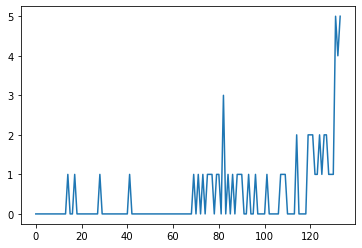

In [10]:
plt.plot(np.arange(0, kl_data.shape[0]), kl_data['Deceased'])

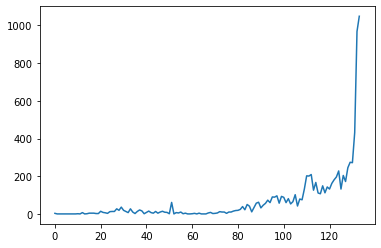

In [11]:
plt.plot(np.arange(0, kl_data.shape[0]), kl_data['Recovered'])

In [12]:
# correlatioin between Recovered and Deceased in Kerala
kl_data.loc[ : , ['Recovered', 'Deceased']].corr()

,Recovered,Deceased
Recovered,1.000000,0.741505
Deceased,0.741505,1.000000


-----------------------------------------------------------------------------------------------------------------------------------

2.) Use regression on “Covid-19” dataset and find the relationship between cured/confirmed and deaths/confirmed.

-----------------------------------------------------------------------------------------------------------------------------------

In [13]:
raw_data = {'Date' : [],
            'Confirmed' : [],
            'Deceased' : [],
            'Recovered' : [],
            'Active' : []}

In [14]:
for i in data['Date'].unique():
    raw_data['Date'].append(i)
    confirmed = data.loc[data['Date'].str.contains(i), 'Confirmed'].sum()
    deceased = data.loc[data['Date'].str.contains(i), 'Deceased'].sum()
    recovered = data.loc[data['Date'].str.contains(i), 'Recovered'].sum()
    raw_data['Confirmed'].append(confirmed)
    raw_data['Deceased'].append(deceased)
    raw_data['Recovered'].append(recovered)
    raw_data['Active'].append(confirmed - (deceased + recovered))

In [15]:
m_data = pd.DataFrame(raw_data)

In [16]:
m_data.head()

,Date,Confirmed,Deceased,Recovered,Active
0,01-Apr-20,848,18,32,798
1,01-Jul-20,38858,876,24128,13854
2,01-Jun-20,15446,402,7764,7280
3,01-May-20,4792,154,1924,2714
4,02-Apr-20,972,28,44,900


In [17]:
m_data['Date'] =pd.to_datetime(m_data['Date'])

In [18]:
m_data = m_data.sort_values('Date')

In [19]:
m_data

,Date,Confirmed,Deceased,Recovered,Active
55,2020-03-14,162,4,18,140
60,2020-03-15,54,0,8,46
65,2020-03-16,30,0,2,28
70,2020-03-17,22,2,2,18
75,2020-03-18,74,0,0,74
...,...,...,...,...,...
88,2020-07-21,78340,1342,55178,21820
93,2020-07-22,91202,2260,63750,25192
98,2020-07-23,96886,1510,66652,28724
103,2020-07-24,97776,1526,65028,31222


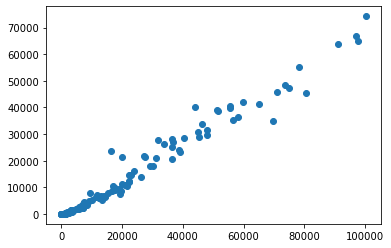

In [20]:
plt.scatter(m_data['Confirmed'], m_data['Recovered'])

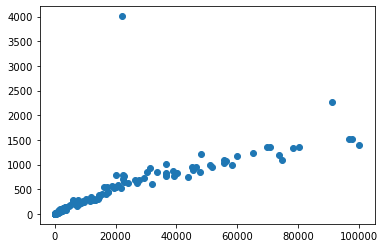

In [21]:
plt.scatter(m_data['Confirmed'], m_data['Deceased'])

In [22]:
regression_1 = scipy.stats.linregress(m_data['Confirmed'], m_data['Recovered'])

In [23]:
regression_1.slope

0.6858700545092653

In [24]:
regression_1.intercept

-957.7081902753962

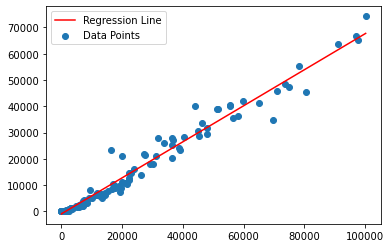

In [25]:
# Regression between Confirmed and Recovered
plt.scatter(m_data['Confirmed'], m_data['Recovered'])
plt.plot(m_data['Confirmed'], [((regression_1.slope * i) + regression_1.intercept) for i in m_data['Confirmed']], color = 'red')
plt.legend(['Regression Line', 'Data Points'])

In [26]:
regression_2 = scipy.stats.linregress(m_data['Confirmed'], m_data['Deceased'])

In [27]:
regression_2.slope

0.017690519667859655

In [28]:
regression_2.intercept

113.22449424258474

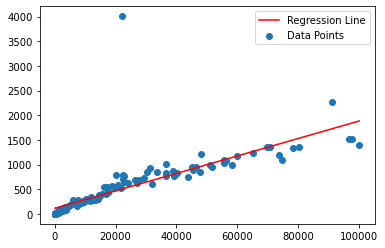

In [29]:
# Regression Between Confirmed and Deceased Cases
plt.scatter(m_data['Confirmed'], m_data['Deceased'])
plt.plot(m_data['Confirmed'], [((regression_2.slope * i) + regression_2.intercept) for i in m_data['Confirmed']], color = 'red')
plt.legend(['Regression Line', 'Data Points'])

-----------------------------------------------------------------------------------------------------------------------------------

3.) Visualize with the help of a heat map. the relationship between  cured/confirmed/deaths taking the data of any 3 states of India.

-------------------------------------------------------------------------------------------------------------------------------------------

In [30]:
# 3 states will be kerala, Uttar pradesh and Uttrakhand

In [31]:
up_data = data.loc[data['State'].str.contains('UP')]

In [32]:
ut_data = data.loc[data['State'].str.contains('UT')]

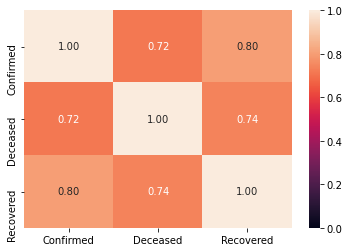

In [33]:
# heatmap for kerala
corrmat = kl_data.corr()
sns.heatmap(corrmat, vmin = 0, vmax = 1, square=False, annot=True, fmt='.2f', annot_kws={'size': 10})

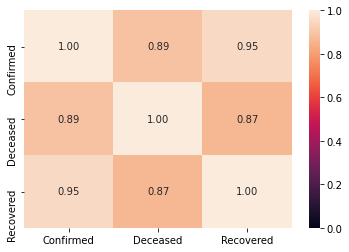

In [34]:
# heatmap for Uttar pradesh
corrmat = up_data.corr()
sns.heatmap(corrmat, vmin = 0, vmax = 1, square=False, annot=True, fmt='.2f', annot_kws={'size': 10})

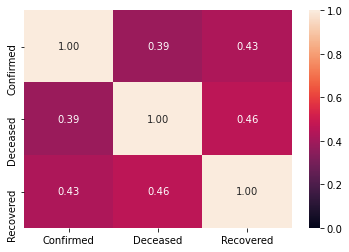

In [35]:
# heatmap for Uttrakhand
corrmat = ut_data.corr()
sns.heatmap(corrmat, vmin = 0, vmax = 1, square=False, annot=True, fmt='.2f', annot_kws={'size': 10})